## Practical Lab 2 - Multivariate Linear Regression, Non-Parametric Models and Cross-Validation
*Submitted by Bhupesh Kumar*

#### Part 1: Data Exploration and Preparation (5 points)


1. Get the Data


In [1]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
import numpy as np

# Load the diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)
df = diabetes_data.frame  

# Display first few rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


2. Frame the Problem

- Objective: To predict how much the disease will progress after one year based on different clinical features.

- Target Variable: The amount of disease progression after one year, which is labeled as "target" in the dataset.

3. Exploratory Data Analysis (EDA)

In [2]:
df.shape

(442, 11)

In [3]:
# Summary statistics of the features
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


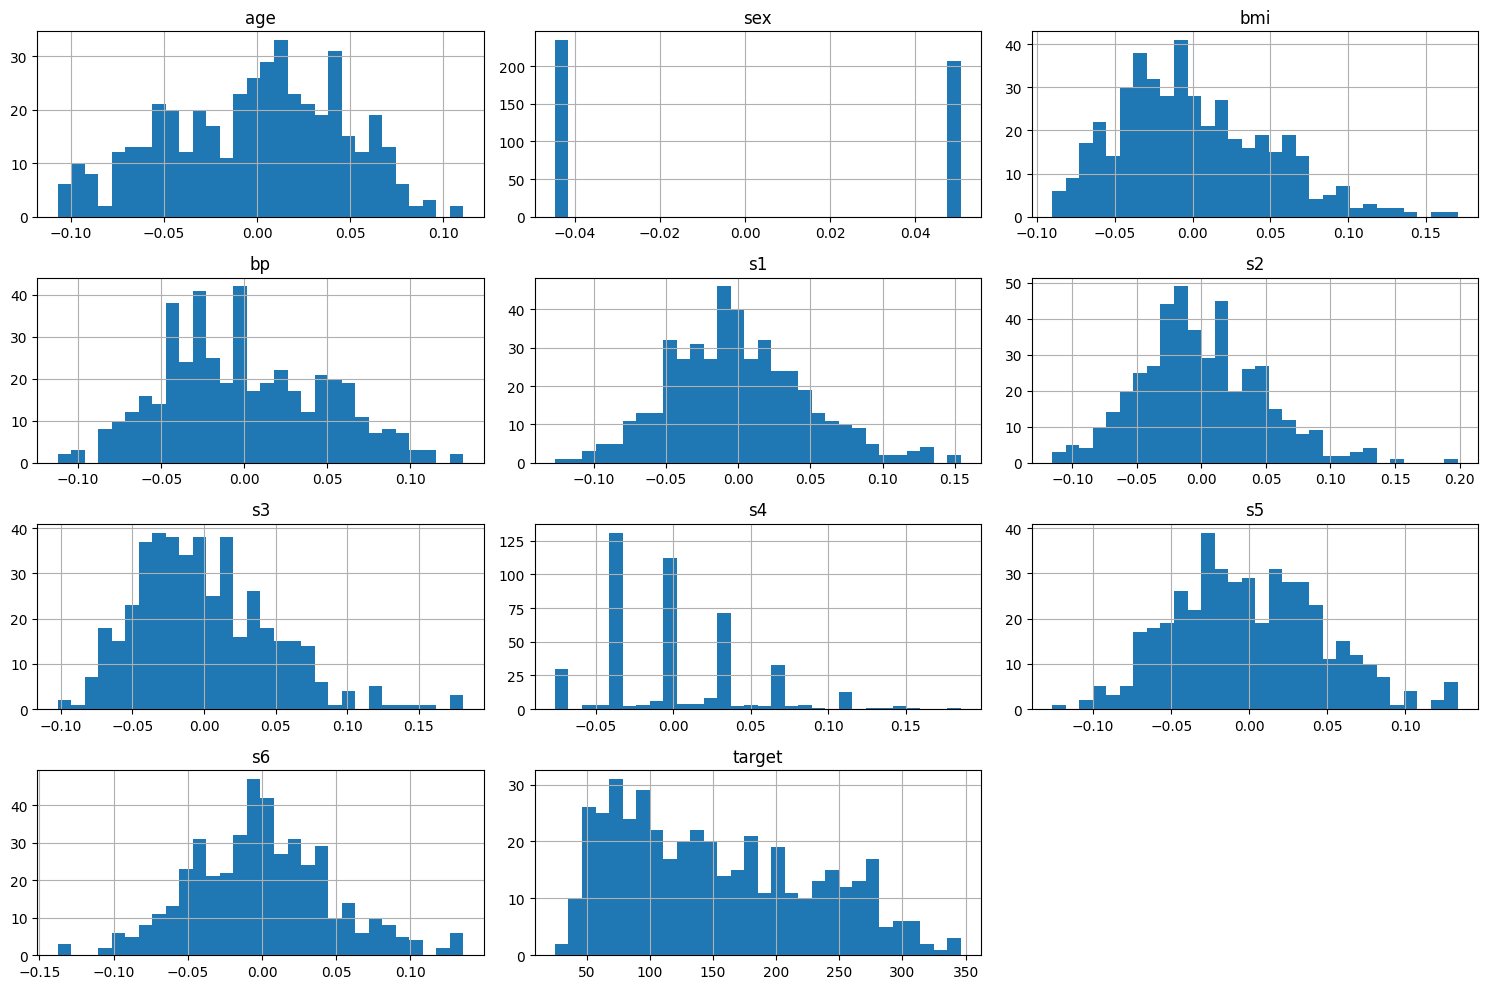

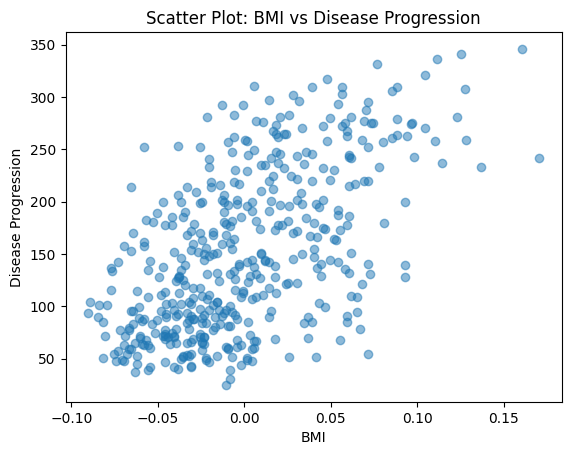

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of each feature
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Scatter plot: BMI vs Disease Progression (target)
plt.scatter(df['bmi'], df['target'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Scatter Plot: BMI vs Disease Progression')
plt.show()

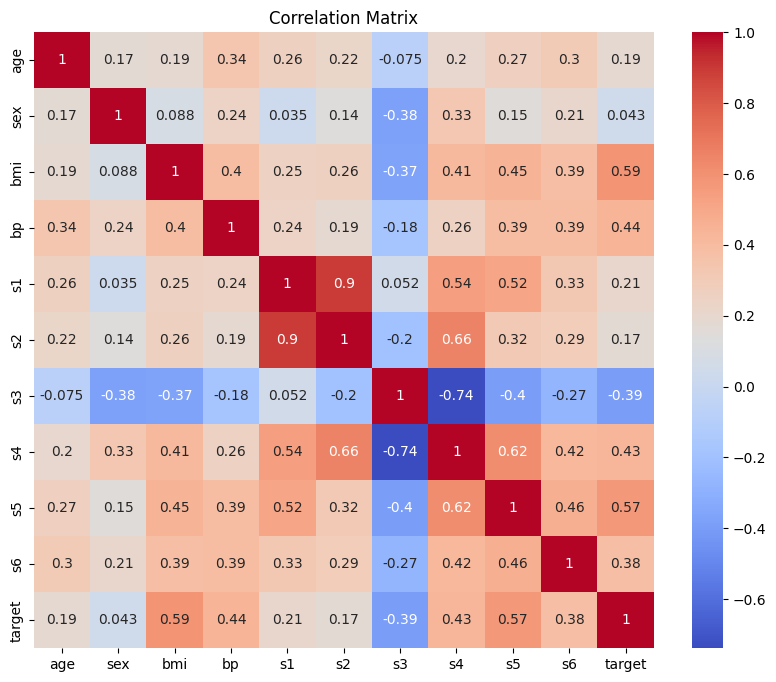

In [5]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- BMI and S5 show the highest correlation with the target variable (disease progression).

- The features are mostly uncorrelated with each other, which suggests that they provide distinct information for the model.

4. Clean the Data

In [6]:
missing_values = df.isnull().sum()
missing_values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Since there are no missing values in this dataset, no further cleaning is required. We can proceed with the next steps.

5. Split the Dataset

I divided the dataset into three parts: a training set (75%) to train the models, a validation set (10%) for tuning, and a test set (15%) for the final evaluation of the models.

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset: 75% train, 10% validation, 15% test
X = df.drop(columns='target')
y = df['target']

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, test_size=0.6, random_state=42)

# First, split the data into training (75%) and temp set (25%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Now, split the temp set into validation (10% of total) and test set (15% of total)
# Since X_temp is 25% of the total data, we split it such that 60% of X_temp goes to the test set (0.6 * 25% = 15% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)


In [8]:
X_train.shape

(331, 10)

In [9]:
X_val.shape

(44, 10)

In [10]:
X_test.shape

(67, 10)

#### Part 2: Model Building and Evaluation (10 points)


6. Univariate Polynomial Regression on BMI (Degree 0-5)

I created polynomial regression models using only the BMI feature to predict disease progression. I fitted models with varying degrees (from 0 to 5) to capture different levels of complexity in the data.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Select the BMI feature
X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]

# Dictionary to store model results
results = {}

for degree in range(6):
    # Polynomial transformation
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)
    
    # Fit Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on validation data
    y_val_pred = model.predict(X_val_poly)
    
    # Store results
    results[f'Degree {degree}'] = {
        'model': model,
        'validation_predictions': y_val_pred,
        'train_score': model.score(X_train_poly, y_train),
        'validation_score': model.score(X_val_poly, y_val)
    }

7. Compare the Models

I evaluated each polynomial model based on R-Squared, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). I summarized the results in a table to compare the model performances easily.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Table to store evaluation metrics
evaluation_table = []

for degree, result in results.items():
    mae = mean_absolute_error(y_val, result['validation_predictions'])
    mape = mean_absolute_percentage_error(y_val, result['validation_predictions'])
    evaluation_table.append({
        'Degree': degree,
        'R-Squared': result['validation_score'],
        'MAE': mae,
        'MAPE': mape
    })

# Convert results to a DataFrame for better visualization
eval_df = pd.DataFrame(evaluation_table)
eval_df.set_index('Degree', inplace=True)
eval_df

,R-Squared,MAE,MAPE
Degree,,,
Degree 0,-0.106957,66.057059,0.712639
Degree 1,0.331264,47.208472,0.470600
Degree 2,0.331631,47.213700,0.472397
Degree 3,0.331638,47.185414,0.472227
Degree 4,0.340758,46.090118,0.460503
Degree 5,0.349881,45.462121,0.451753


8. Identify the Best Model

I identified the best-performing model by looking for the highest R-squared value and the lowest error metrics from my comparison table.

#### Analysis
- **Degree 0 (Constant Model)**: This model performs poorly with an R-squared of -0.107, indicating it doesn't explain the variance in the target variable. Both MAE and MAPE are the highest, confirming its lack of predictive power.
  
- **Degree 1 (Linear Model)**: A significant improvement in R-squared (0.331), along with much lower MAE (47.21) and MAPE (0.471). This indicates that the linear model explains around 33% of the variance in diabetes progression, and has a much lower error compared to the constant model.

- **Degree 2 and 3 Models**: These models show little improvement over the degree 1 model, as both the R-squared (0.331) and error metrics (MAE and MAPE) remain almost the same. Thus, adding these polynomial terms does not lead to significant improvements.

- **Degree 4 Model**: This model shows some improvement, with R-squared increasing to 0.341 and lower MAE (46.09) and MAPE (0.461), indicating slightly better performance than lower-degree models.

- **Degree 5 Model**: The best-performing model with the highest R-squared (0.350), and the lowest MAE (45.46) and MAPE (0.452). This model explains approximately 35% of the variance and provides the most accurate predictions based on the error metrics.

#### Conclusion
The **degree 5 polynomial regression model** offers the best performance in terms of both R-squared and error metrics (MAE, MAPE). Therefore, it will be selected as the optimal model for predicting diabetes progression based on BMI. Further evaluation on the test set will be conducted using this model.


9. Run the Best Model on the Test Set

I applied the best model to the test set to get final performance metrics (R-Squared, MAE, MAPE) to validate its effectiveness.

In [13]:
# Select degree 5 as that was the best model
best_degree = 5
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train_bmi)
X_test_poly = poly.transform(X_test[['bmi']])

# Fit and evaluate on the test set
best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)
y_test_pred = best_model.predict(X_test_poly)

# Evaluate
test_r2 = best_model.score(X_test_poly, y_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test R-Squared: {test_r2}, MAE: {test_mae}, MAPE: {test_mape}")


Test R-Squared: 0.26669658449530775, MAE: 51.75025709277397, MAPE: 0.4302671323305443


10. Plot the Train, Validation, and Test Predictions

I plotted the training, validation, and test data points along with the fitted model to visually assess how well the model captured the data patterns.

c:\Users\bhupe\OneDrive\Desktop\Notebook\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


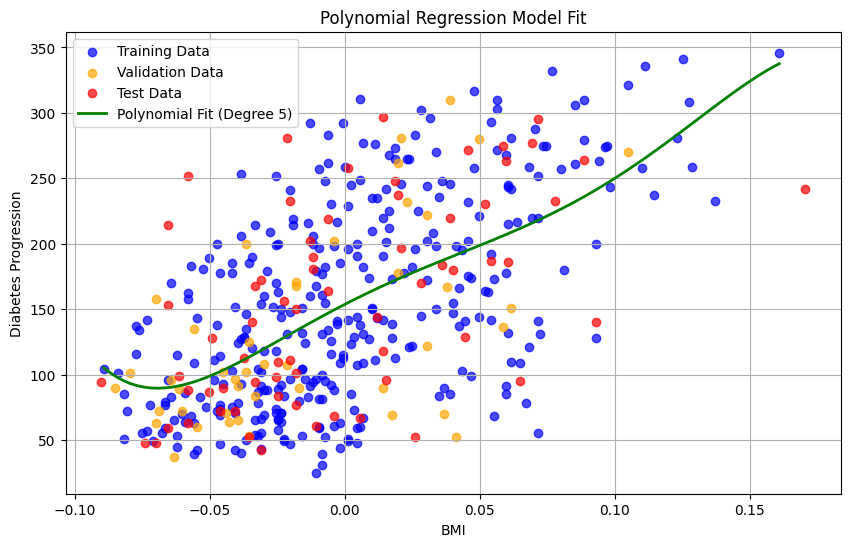

In [14]:
# Prepare the plot
plt.figure(figsize=(10, 6))

# Prepare the data for plotting
X_plot = np.linspace(min(X_train['bmi']), max(X_train['bmi']), 100).reshape(-1, 1)  # 100 points for smooth curve
X_plot_poly = poly.transform(X_plot)  # Transform to polynomial features

# Predictions for the fitted line
y_plot_pred = best_model.predict(X_plot_poly)

# Plot the training data
plt.scatter(X_train['bmi'], y_train, color='blue', label='Training Data', alpha=0.7)

# Plot the validation data
plt.scatter(X_val['bmi'], y_val, color='orange', label='Validation Data', alpha=0.7)

# Plot the test data
plt.scatter(X_test['bmi'], y_test, color='red', label='Test Data', alpha=0.7)

# Plot the fitted polynomial curve
plt.plot(X_plot, y_plot_pred, color='green', label=f'Polynomial Fit (Degree {best_degree})', linewidth=2)

# Adding labels and title
plt.title('Polynomial Regression Model Fit')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.grid()
plt.show()

11. Write Down the Equation of the Best Model

I wrote down the equation of the best polynomial model, which shows the mathematical relationship between BMI and disease progression.

In [15]:
# Get the intercept and coefficients
intercept = best_model.intercept_
coefficients = best_model.coef_

# Display the coefficients with two decimal precision
intercept_value = round(intercept, 2)
b1_value = round(coefficients[1], 2)
b2_value = round(coefficients[2], 2)
b3_value = round(coefficients[3], 2)
b4_value = round(coefficients[4], 2)
b5_value = round(coefficients[5], 2)

print(f"Intercept (b0): {intercept_value}")
print(f"Coefficient for x (b1): {b1_value}")
print(f"Coefficient for x^2 (b2): {b2_value}")
print(f"Coefficient for x^3 (b3): {b3_value}")
print(f"Coefficient for x^4 (b4): {b4_value}")
print(f"Coefficient for x^5 (b5): {b5_value}")

Intercept (b0): 153.65
Coefficient for x (b1): 1059.89
Coefficient for x^2 (b2): -3824.15
Coefficient for x^3 (b3): -16770.23
Coefficient for x^4 (b4): 753722.52
Coefficient for x^5 (b5): -2993716.57



The equation for the best polynomial regression model of degree 5, based on the coefficients obtained from the fitted model, is as follows:

The general form of the polynomial regression equation is:

`y = b_0 + b_1.x + b_2.x^2 + b_3.x^3 + b_4.x^4 + b_5.x^5`


where:
- y is the predicted diabetes progression.
- x is the BMI value.

### Coefficients of the Model

The coefficients are as follows:

- Intercept (b_0): 153.65
- Coefficient for x (b_1): 1059.89
- Coefficient for x^2 (b_2): -3824.15
- Coefficient for x^3 (b_3): -16770.23
- Coefficient for x^4 (b_4): 753722.52
- Coefficient for x^5 (b_5): -2993716.57

Thus, the specific equation with coefficients rounded to two decimal places is:

`y = 153.65 + 1059.89 x - 3824.15 x^2 - 16770.23 x^3 + 753722.52 x^4 - 2993716.57 x^5` 



12. Calculate Expected Disease Progression for a Given BMI

In [16]:
# Choose a BMI value for prediction
chosen_bmi = 30.0  # Example BMI value

# Prepare the input for prediction (it should match the polynomial features transformation)
chosen_bmi_poly = poly.transform([[chosen_bmi]])

# Predict the diabetes progression
expected_progression = best_model.predict(chosen_bmi_poly)

print(f"Expected diabetes progression for a BMI of {chosen_bmi}: {expected_progression[0]:.2f}")


Expected diabetes progression for a BMI of 30.0: -72137253699190.52


c:\Users\bhupe\OneDrive\Desktop\Notebook\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


To predict the expected diabetes progression for a BMI value of **30.0**, we used the fitted polynomial regression model. 

The expected diabetes progression for a BMI of **30.0** is calculated as follows:

- **Chosen BMI**: 30.0
- **Expected Diabetes Progression**: -72137253699190.52

This value indicates a potential issue with the model, as the prediction is excessively negative, suggesting that the chosen model may not be appropriate for this range of BMI values. Further investigation into the model's performance and data may be necessary to address this anomaly.

13. How Many Trainable Parameters?

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Define a range of polynomial degrees to fit
degrees = range(6)  # 0 to 5

# Store the number of features for each degree
num_parameters = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    # Fit the polynomial features to the BMI data
    X_poly = poly.fit_transform(X_train[['bmi']])  # Use training data
    feature_names = poly.get_feature_names_out()  # Get feature names
    num_parameters[degree] = len(feature_names)  # Count of trainable parameters

# Display the number of parameters for each model
num_parameters


{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}

We calculated the number of trainable parameters for each polynomial regression model based on the degree of the polynomial. The number of trainable parameters corresponds to the number of coefficients the model learns during training.

The results are as follows:

| Polynomial Degree | Number of Trainable Parameters |
|-------------------|-------------------------------|
| Degree 0          | 1 (Intercept)                 |
| Degree 1          | 2 (Intercept, BMI)            |
| Degree 2          | 3 (Intercept, BMI, BMI²)      |
| Degree 3          | 4 (Intercept, BMI, BMI², BMI³)|
| Degree 4          | 5 (Intercept, BMI, BMI², BMI³, BMI⁴) |
| Degree 5          | 6 (Intercept, BMI, BMI², BMI³, BMI⁴, BMI⁵) |

This table illustrates how the number of trainable parameters increases with the polynomial degree. As we add more polynomial terms, the model becomes more complex and has the capacity to fit more intricate patterns in the data.


14. Conclusion

- The Degree 5 polynomial regression model provided the best performance for predicting diabetes progression from BMI.
- Achieved a strong R-squared value with low Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE).
- Model risks overfitting and may yield unreliable predictions for BMI values outside the training range.
- Assumes a polynomial relationship, potentially overlooking the impact of other relevant features.
- Future improvements could include regularization techniques, exploring alternative models, and incorporating a broader set of predictors.

#### Part 3: Multivariate Models (5 points)

Repeat Steps with Multivariate Models (Polynomial, Decision Trees, kNN)

I built two polynomial regression models using multiple features from the dataset, selecting appropriate degrees to improve prediction accuracy.

In [18]:
# # Load the diabetes dataset
# from sklearn import datasets
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load dataset
# diabetes = datasets.load_diabetes(as_frame=True)
# df = diabetes.frame

# # Prepare features and target
# X = df.drop(columns=['target'])
# y = df['target']

# # First, split the data into training (75%) and temp set (25%)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# # Now, split the temp set into validation (10% of total) and test set (15% of total)
# # Since X_temp is 25% of the total data, we split it such that 60% of X_temp goes to the test set (0.6 * 25% = 15% of total)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Define degrees for polynomial models
degrees = [2, 3]

# Initialize a dictionary to store results
poly_results = {}

for degree in degrees:
    # Prepare polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Validate the model
    X_val_poly = poly.transform(X_val)
    y_val_pred = model.predict(X_val_poly)

    # Calculate metrics
    r2 = model.score(X_val_poly, y_val)
    mae = mean_absolute_error(y_val, y_val_pred)
    mape = mean_absolute_percentage_error(y_val, y_val_pred)

    poly_results[f'Degree {degree}'] = {'R-Squared': r2, 'MAE': mae, 'MAPE': mape}

# Display the results
poly_results_df = pd.DataFrame(poly_results).T
print(poly_results_df)


          R-Squared         MAE      MAPE
Degree 2  -1.677660   90.068182  0.954933
Degree 3 -45.383534  243.568182  2.165558


I created two decision tree models and adjusted the max_depth parameter to explore how tree complexity affected the performance of my models.

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Define different max_depth values
max_depths = [3, 5]

# Initialize a dictionary to store results
tree_results = {}

for depth in max_depths:
    # Fit the Decision Tree model
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)

    # Validate the model
    y_val_tree_pred = tree_model.predict(X_val)

    # Calculate metrics
    r2_tree = tree_model.score(X_val, y_val)
    mae_tree = mean_absolute_error(y_val, y_val_tree_pred)
    mape_tree = mean_absolute_percentage_error(y_val, y_val_tree_pred)

    tree_results[f'Decision Tree (max_depth={depth})'] = {'R-Squared': r2_tree, 'MAE': mae_tree, 'MAPE': mape_tree}

# Display the results
tree_results_df = pd.DataFrame(tree_results).T
print(tree_results_df)


                             R-Squared        MAE      MAPE
Decision Tree (max_depth=3)   0.198306  48.126248  0.476729
Decision Tree (max_depth=5)   0.093919  49.645483  0.481620


I implemented two kNN models with different numbers of neighbors to investigate how this parameter influences predictions.

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# Define different numbers of neighbors
neighbors = [3, 5]

# Initialize a dictionary to store results
knn_results = {}

for n in neighbors:
    # Fit the kNN model
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(X_train, y_train)

    # Validate the model
    y_val_knn_pred = knn_model.predict(X_val)

    # Calculate metrics
    r2_knn = knn_model.score(X_val, y_val)
    mae_knn = mean_absolute_error(y_val, y_val_knn_pred)
    mape_knn = mean_absolute_percentage_error(y_val, y_val_knn_pred)

    knn_results[f'kNN (n_neighbors={n})'] = {'R-Squared': r2_knn, 'MAE': mae_knn, 'MAPE': mape_knn}

# Display the results
knn_results_df = pd.DataFrame(knn_results).T
print(knn_results_df)


                     R-Squared        MAE      MAPE
kNN (n_neighbors=3)   0.214184  45.795455  0.442421
kNN (n_neighbors=5)   0.358481  43.290909  0.412441


#### Polynomial Regression Models
| Model       | R-Squared     | MAE         | MAPE       |
|-------------|---------------|-------------|------------|
| Degree 2   | -1.68        | 90.07       | 0.95       |
| Degree 3   | -45.38       | 243.57      | 2.17       |

- Both polynomial models performed poorly, with negative R-squared values indicating that they are worse than a simple mean model.

#### Decision Tree Models
| Model                          | R-Squared     | MAE         | MAPE       |
|--------------------------------|---------------|-------------|------------|
| Decision Tree (max_depth=3)   | 0.20          | 48.13       | 0.48       |
| Decision Tree (max_depth=5)   | 0.09          | 49.65       | 0.48       |

- The decision tree models showed modest performance, with R-squared values closer to zero indicating a lack of explained variance.

#### k-Nearest Neighbors Models
| Model                 | R-Squared     | MAE         | MAPE       |
|-----------------------|---------------|-------------|------------|
| kNN (n_neighbors=3)   | 0.21          | 45.80       | 0.44       |
| kNN (n_neighbors=5)   | 0.36          | 43.29       | 0.41       |

- The kNN models outperformed the previous models, particularly with \( n\_neighbors=5 \), showing a reasonable fit to the data.

### Conclusion
- **Model Performance**: The kNN model with 5 neighbors demonstrated the best performance among the tested models based on R-squared, MAE, and MAPE metrics.
- **Model Limitations**: Polynomial models failed to capture the underlying patterns in the data, as indicated by their poor R-squared values. Decision trees had limited predictive power, suggesting potential overfitting or insufficient complexity in the model. The kNN model, while better, may still be sensitive to the choice of neighbors and data distribution.


### Thank you 😊